# Load the libraries

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn

# Load the Data & First look

In [35]:
# Load the data
df = pd.read_csv("../data/UCI_Credit_Card.csv",index_col = 0)

## About the Data
- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
## About the Variables
There are 25 variables:

- `ID`: ID of each client
- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- `SEX`: Gender (1=male, 2=female)
- `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
- `AGE`: Age in years
- `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2`: Repayment status in August, 2005 (scale same as above)
- `PAY_3`: Repayment status in July, 2005 (scale same as above)
- `PAY_4`: Repayment status in June, 2005 (scale same as above)
- `PAY_5`: Repayment status in May, 2005 (scale same as above)
- `PAY_6`: Repayment status in April, 2005 (scale same as above)
- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
- `default.payment.next.month`: Default payment (1=yes, 0=no)

## Rename the column
- I'm not really comfortable with the `PAY_0` then `PAY_2`, so it's better to change the `PAY_0` to `PAY_1`
- Also, the target name is long, so I will make change to that

In [36]:
df.rename(columns= {'PAY_0': 'PAY_1', 'default.payment.next.month' : 'DEFAULT'}, inplace =  True)

In [37]:
print(f"RENAMED COLUMNS: {df.columns}")

RENAMED COLUMNS: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


## First look at the data

In [38]:
df.shape

(30000, 24)

- 24 features, and 30000 instances

In [39]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


- We successfully loaded the data !

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   

- The datatypes are all valid, and actually some categorical features have already been encoded, so we don't have to handle those data later on

In [41]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From our initial observations:
- Some `BILL_AMT` attributes include some negative values, which is invalid. We need to examine that later.
- Counts are all equal with the number of instances, signalling that the data has no missing values.
- Early skewness spotted: `AGE` ranges from `21` to `79`, yet the mean is around `35` (Right skewed)

**Update**: Actually the negative values in `BILL_AMT` mean credit/refund, so no problems there

Let's look at the target:

In [42]:
df['DEFAULT'].value_counts()

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

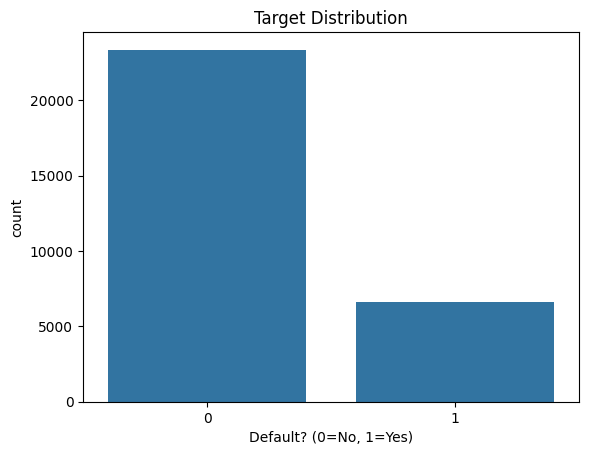

In [43]:
sns.countplot(x='DEFAULT', data=df)
plt.title('Target Distribution')
plt.xlabel('Default? (0=No, 1=Yes)')
plt.show()

-> Data Imbalance

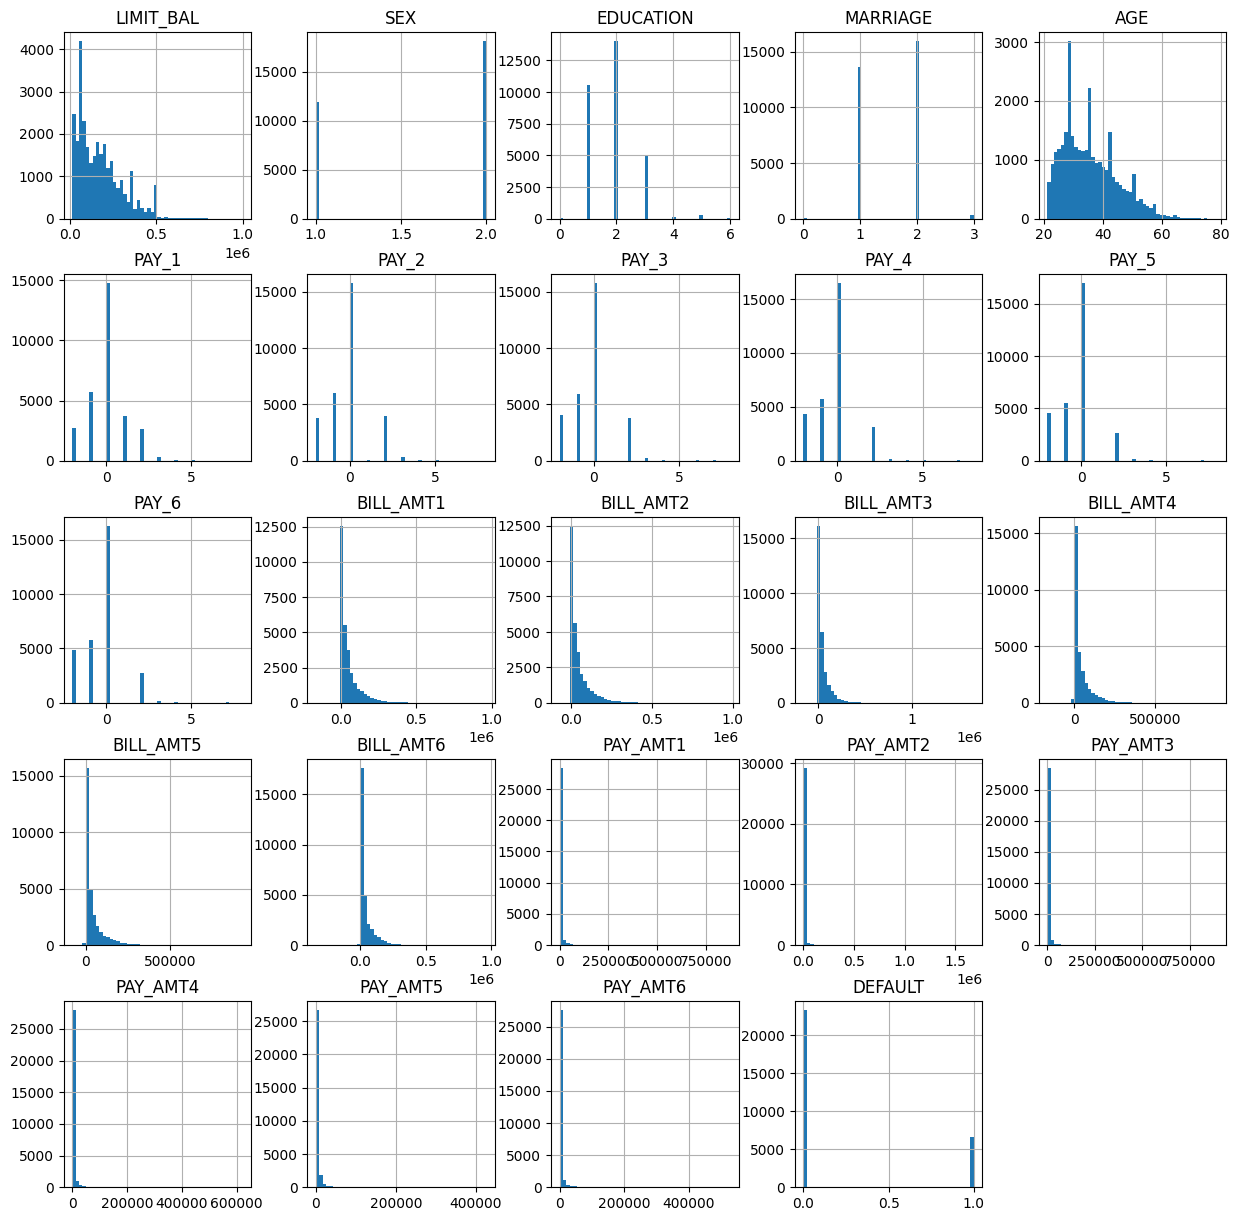

In [44]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

# 2. Clean the data

## 2.1. Handle missing Values

In [45]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [46]:
miss_val_tol = df.isna().sum().sum()
print(f'The total number of missing values is: {miss_val_tol}')

The total number of missing values is: 0


- No missing values recorded (Yay!)

It doesn't end there, mate. There are actually some ***Hidden Null***

### Hidden Nulls

From the description, in the `EDUCATION`, the values `5` and `6` actually represent for unknowns. Those are considered NaN values!


## 2.2. Handle Duplicates

In [47]:
df.duplicated().sum()

np.int64(35)

In [48]:
df[df.duplicated() == True]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1981,150000.0,2,1,1,38,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4586,150000.0,2,1,1,31,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6023,210000.0,2,1,2,39,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6467,210000.0,2,2,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7320,500000.0,1,1,1,43,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8321,360000.0,1,2,1,41,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10251,50000.0,1,2,2,26,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13107,360000.0,2,1,1,49,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14295,20000.0,1,2,2,24,2,2,4,4,4,...,1650.0,1650.0,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
df.drop_duplicates(inplace = True)
dup_count = df.duplicated().sum()
print(f"Number of duplicates left: {dup_count}")

Number of duplicates left: 0


## 2.3. Categorical Consistency

In [50]:
# Separate out the categorical attribute
# Oftentimes we don't have to do this
categories = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(1,7)]
print(f"Categorical attributes of the data: {categories}")

Categorical attributes of the data: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [51]:
# Cardinality check
for col in categories:
    print(f'======={col}=======')
    print(df[col].value_counts().sort_index())
    print("\n")

=======SEX=======
SEX
1    11874
2    18091
Name: count, dtype: int64


=======EDUCATION=======
EDUCATION
0       14
1    10563
2    14019
3     4915
4      123
5      280
6       51
Name: count, dtype: int64


=======MARRIAGE=======
MARRIAGE
0       54
1    13643
2    15945
3      323
Name: count, dtype: int64


=======PAY_1=======
PAY_1
-2     2750
-1     5682
 0    14737
 1     3667
 2     2666
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64


=======PAY_2=======
PAY_2
-2     3752
-1     6046
 0    15730
 1       28
 2     3926
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64


=======PAY_3=======
PAY_3
-2     4055
-1     5934
 0    15764
 1        4
 2     3819
 3      240
 4       75
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64


=======PAY_4=======
PAY_4
-2     4318
-1     5683
 0    16455
 1        2
 2     3159
 3      180
 4       68
 5       35
 6   

- Those are hard to see so a better way is through visualizing

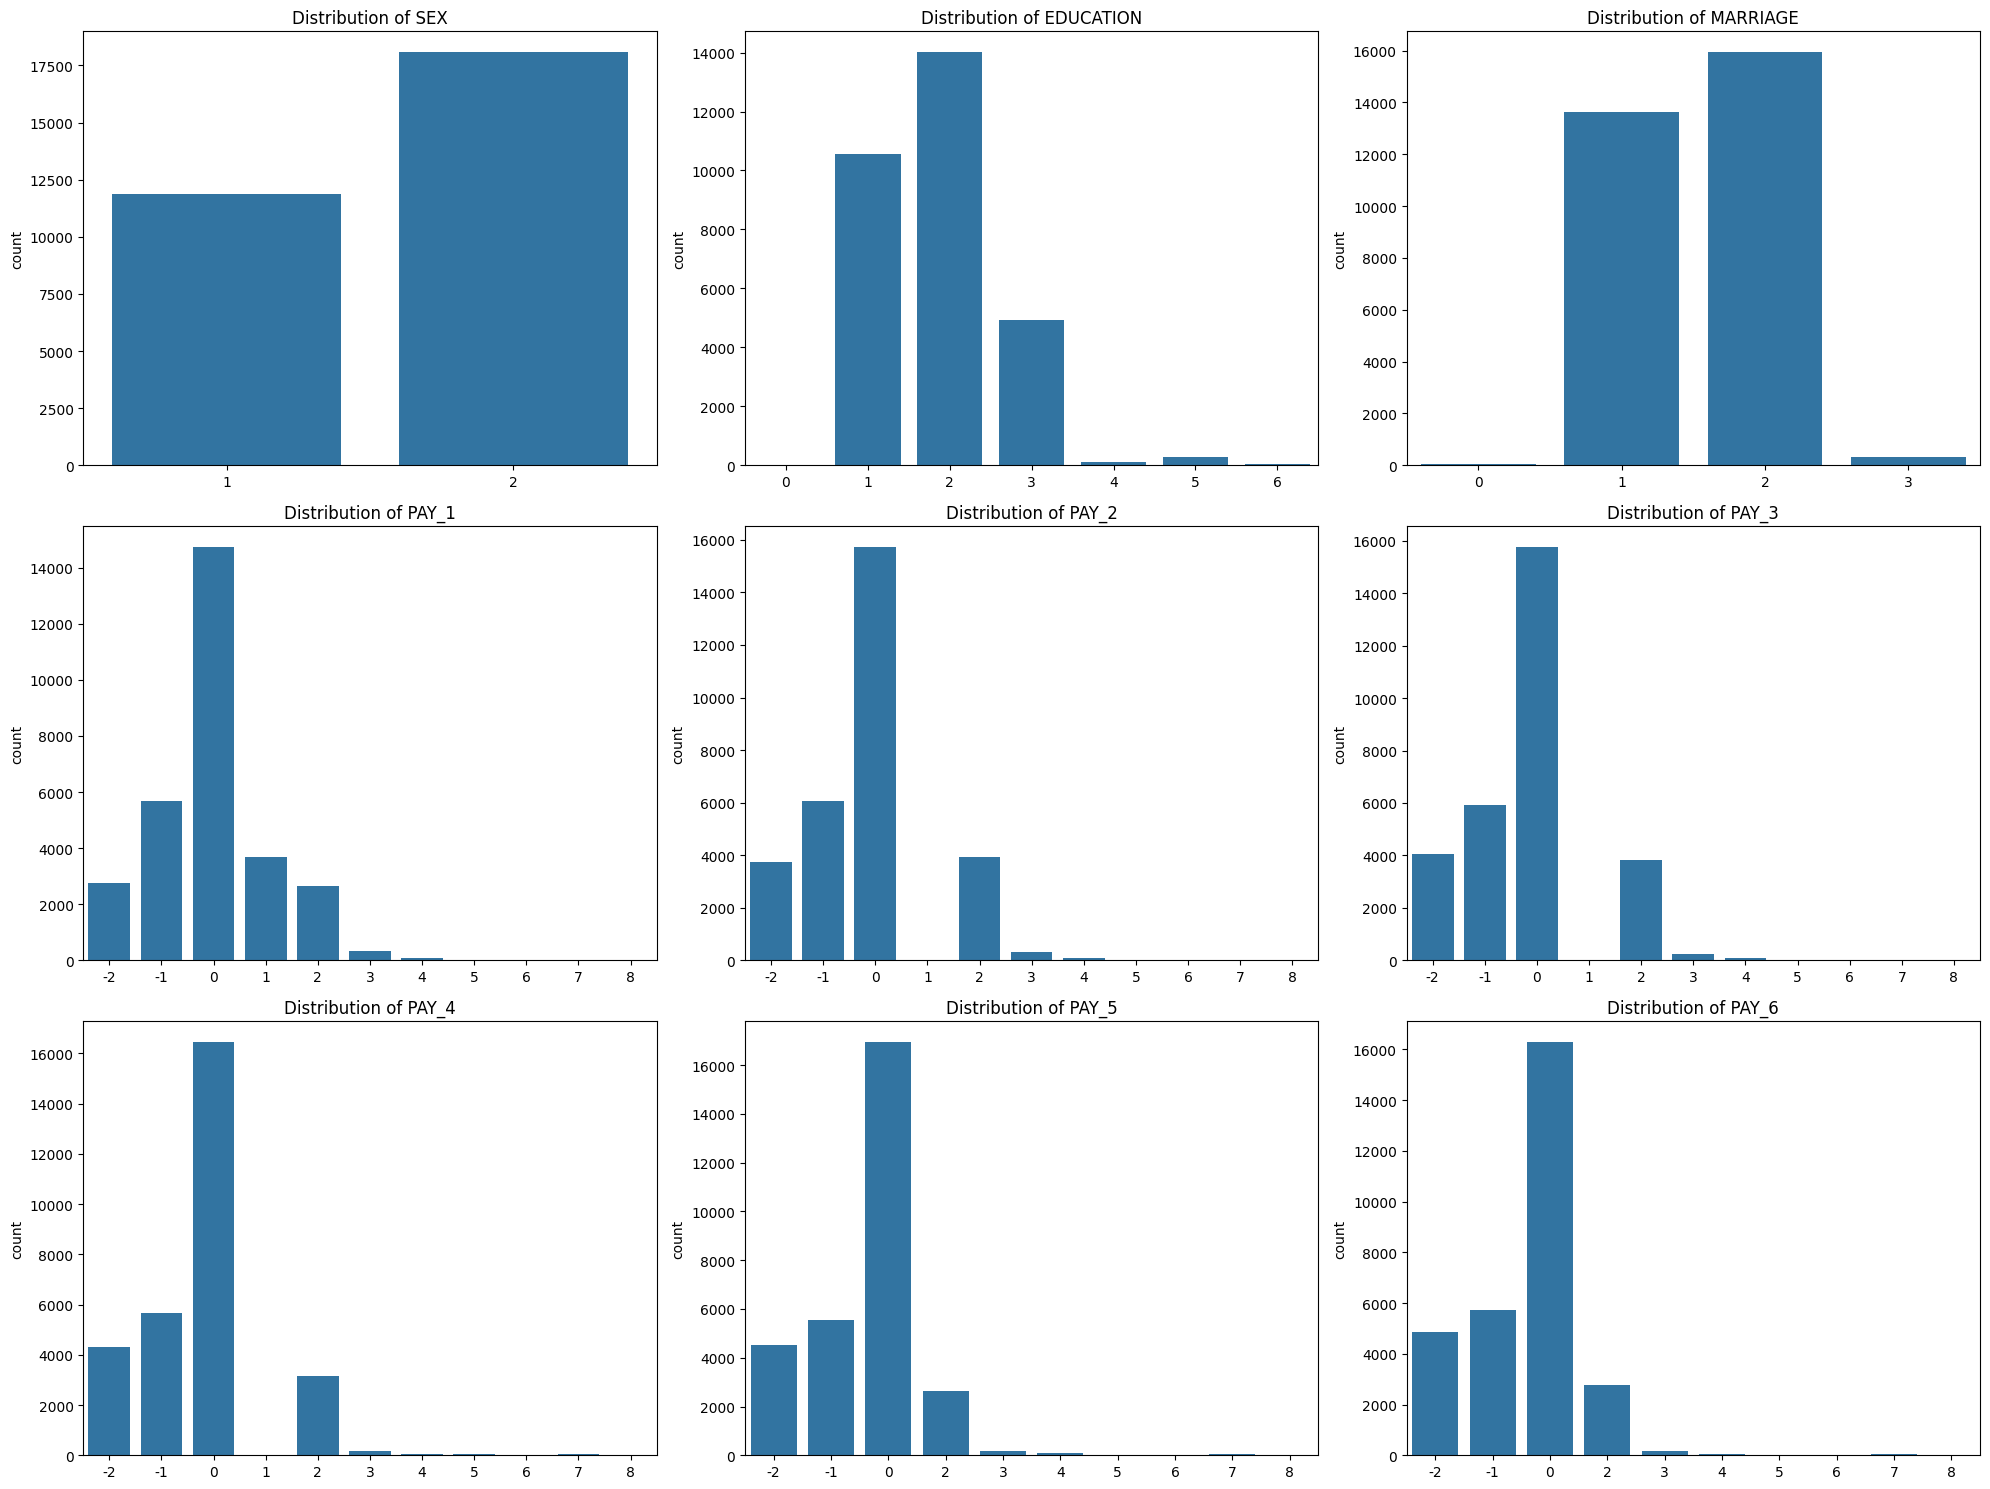

In [52]:
# Creating the "canva", 20 inches in width and 15 inches in height -> Large graph
plt.figure(figsize = (20,15))
for i, col in enumerate(categories,1):
    plt.subplot(3,3,i) # Creat a 3x3 grid (actually the number of cat-attr is conveniently 9, 3x3 is perfect), the number i denote the position in the grid
    sns.countplot(x=col, data = df)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
# Make sure that there is no overlaps
plt.tight_layout()
plt.show()

From the graphs we can see that the distribution is somewhat inconsistent with the description:
- `MARRIAGE`: There are values of `0`, it makes no sense. Maybe we should merge it with values `3` (Others)
- In `EDUCATION`, there are actually `0` values, which are not recorded in the description. We will also deal with the `5` and `6` by merging them all into `4` (Others)
- `PAY_1` to `PAY_6`: `-2` and `0` are not recorded in the description, yet appeared in the graphs. Those values are actually meaningful in practice:
`2` is for `no_consumption` and `0` is for `revolving credit but minimum paid`. So we will keep those values.

We work with `EDUCATION` and `MARRIAGE`

In [53]:
print("--- BEFORE ---")
print("Education:\n", df['EDUCATION'].value_counts().sort_index())
print("Marriage:\n", df['MARRIAGE'].value_counts().sort_index())

--- BEFORE ---
Education:
 EDUCATION
0       14
1    10563
2    14019
3     4915
4      123
5      280
6       51
Name: count, dtype: int64
Marriage:
 MARRIAGE
0       54
1    13643
2    15945
3      323
Name: count, dtype: int64


In [54]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

In [55]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

In [56]:
print("\n--- AFTER ---")
print("Education:\n", df['EDUCATION'].value_counts().sort_index())
print("Marriage:\n", df['MARRIAGE'].value_counts().sort_index())


--- AFTER ---
Education:
 EDUCATION
1    10563
2    14019
3     4915
4      468
Name: count, dtype: int64
Marriage:
 MARRIAGE
1    13643
2    15945
3      377
Name: count, dtype: int64


## 2.4. Numerical Logic

We move to analysis of numerical attributes:
- Invalid values (negatives, or some impossible value, like `AGE` goes up to 150)
- Outliers, we will use boxplot for this

In [57]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.842750,1.557283,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.744513,0.521431,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


***Sanity check***: 
- `AGE` consists of all valid values
- There are some negative values in the `BILL_AMT`, but as discussed earlier, those represent for credit/refund, so thing's good.
- `PAY_AMT` has valid values (higher than zero)

**DETECTING OUTLIERS**

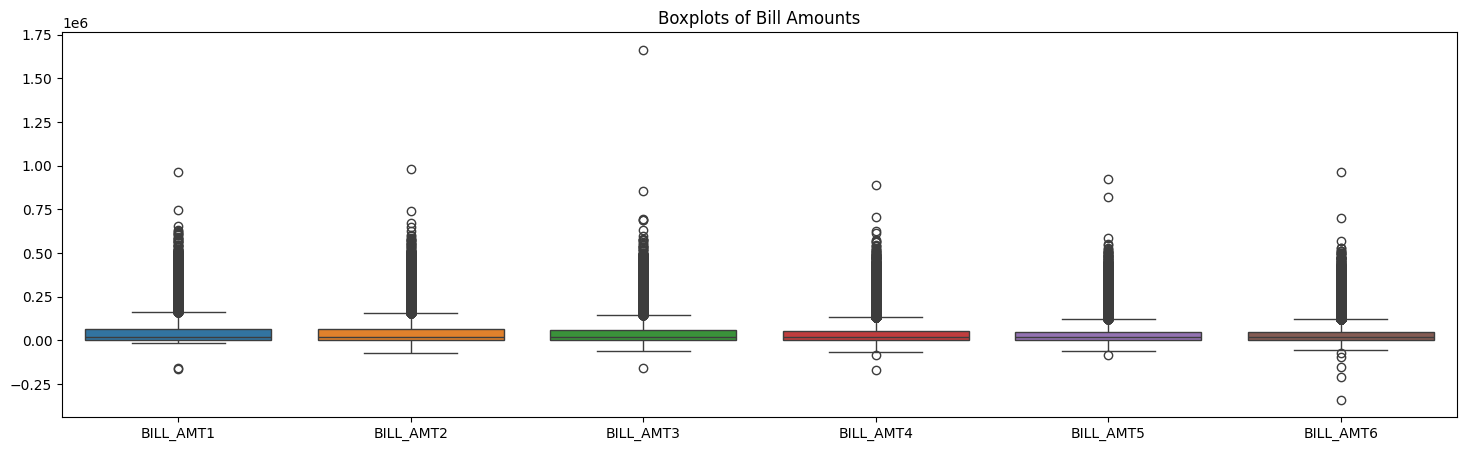

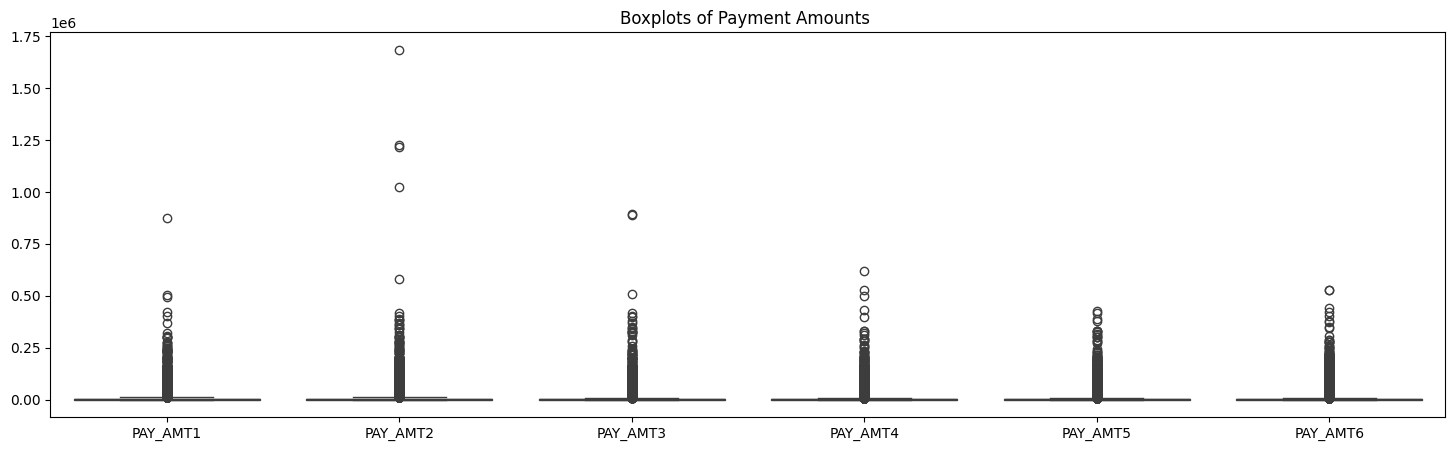

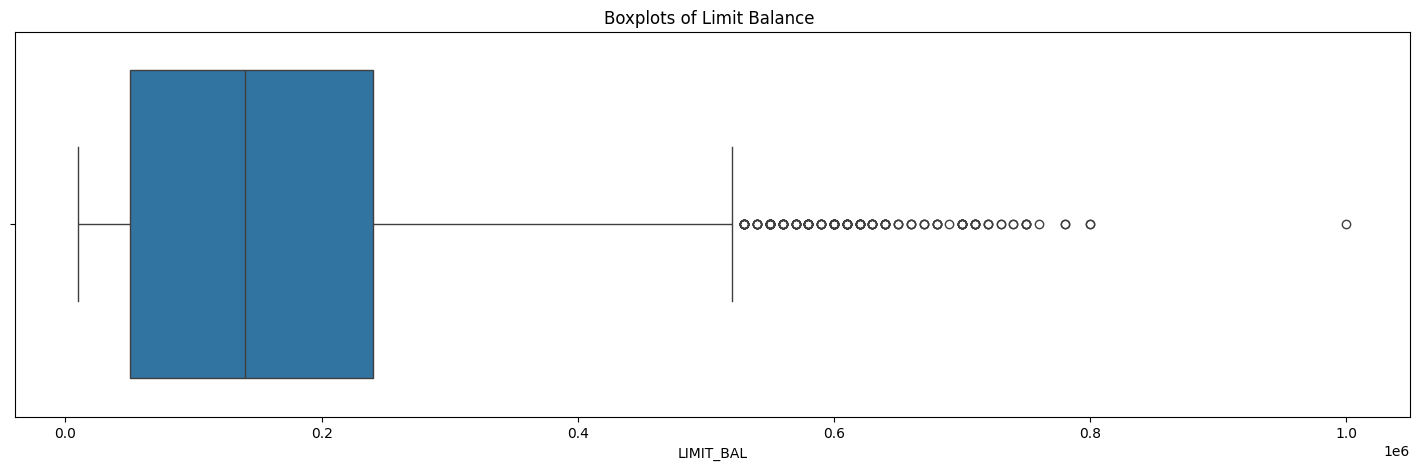

In [58]:
# Bill and Payment Amount Columns
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

# 1. Boxplots for Bill Amounts
plt.figure(figsize=(18, 5))
sns.boxplot(data=df[bill_cols])
plt.title('Boxplots of Bill Amounts')
plt.show()

# 2. Boxplots for Payment Amounts
plt.figure(figsize=(18, 5))
sns.boxplot(data=df[pay_amt_cols])
plt.title('Boxplots of Payment Amounts ')
plt.show()

# 2. Boxplots for LIMIT_BAL
plt.figure(figsize=(18, 5))
sns.boxplot(x = 'LIMIT_BAL',data=df)
plt.title('Boxplots of Limit Balance ')
plt.show()

Those are huge numbers of outliers ! Actually, I would love to see the maximum value (there are some values that are really far apart)

In [59]:
print("\n--- Max values---")
print(df[bill_cols].describe().loc[['max']])
print(df[pay_amt_cols].describe().loc[['max']])


--- Max values---
     BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
max   964511.0   983931.0  1664089.0   891586.0   927171.0   961664.0
     PAY_AMT1   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
max  873552.0  1684259.0  896040.0  621000.0  426529.0  528666.0


What we will do with those outliers? We can
- **Delete** them
- **Transform** the data (log,root)
- **Scale** the data (but it's not really good, because the range changes only)

Also, a rule of thumb in these finance problem, outliers (large values specifically) can have some valuable information. Normally, we keep them rather than delete, and later on we will use approaches that are less sensitive to outliers (Tree-based model). And it's understandable not to delete those things, as there are too many of them.

# 3. EXPLORATORY DATA ANALYSIS

## 3.1. UNIVARIATE ANALYSIS

We examine one variable at a time:
- ***Check central tendency/spread (Numerical)***
- ***Visualize Distribution (Numerical)***
- ***Check Class Balance (Target)***
- ***Visualize Frequencies (Categorical)***

Actually we did all of those in the previous steps, so we will skip this part

## 3.2. BIVARIATE / MULTIVARIATE ANALYSIS

### Visualize feature-feature correlation by heatmaps

In [60]:
num_col = [col for col in df.columns if col not in categories]

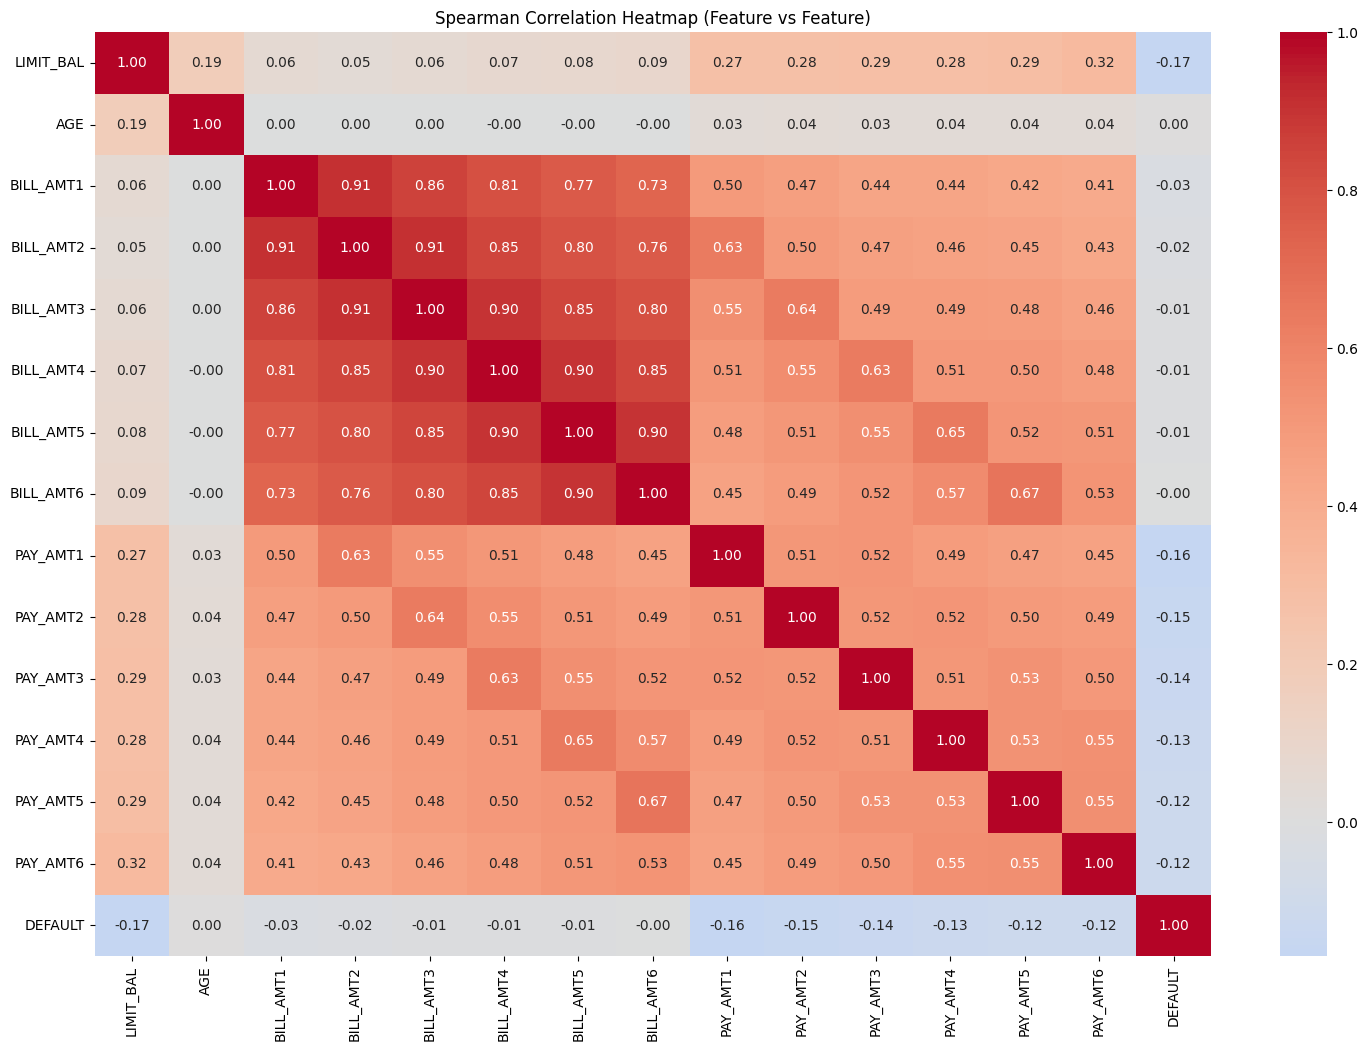

In [61]:
# Calculate Spearman correlation (better for skewed financial data)
corr_matrix = df[num_col].corr(method='spearman')

# Plot the Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap (Feature vs Feature)')
plt.show()

From the heatmap, we can see that:
- `BILL_AMT` and `PAY_AMT` from 1 to 6 are often really highlt correlated, but those are less correlated with the target.
- `BILL_AMT` from 1 to 6 are **strongly correlated** with each other.
- `LIMIT_BAL` and `PAY_AMT` show signs of correlation, while `AGE` doesn't behave friendly with others.

What we will do with those highly correlated features:
- If we're planning to use Logistic Regression, we might consider averaging them or keeping only the most recent one.
- For Random Forest, it's fine. So maybe we will leave it here.

In [62]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

### Feature - Target Correlation

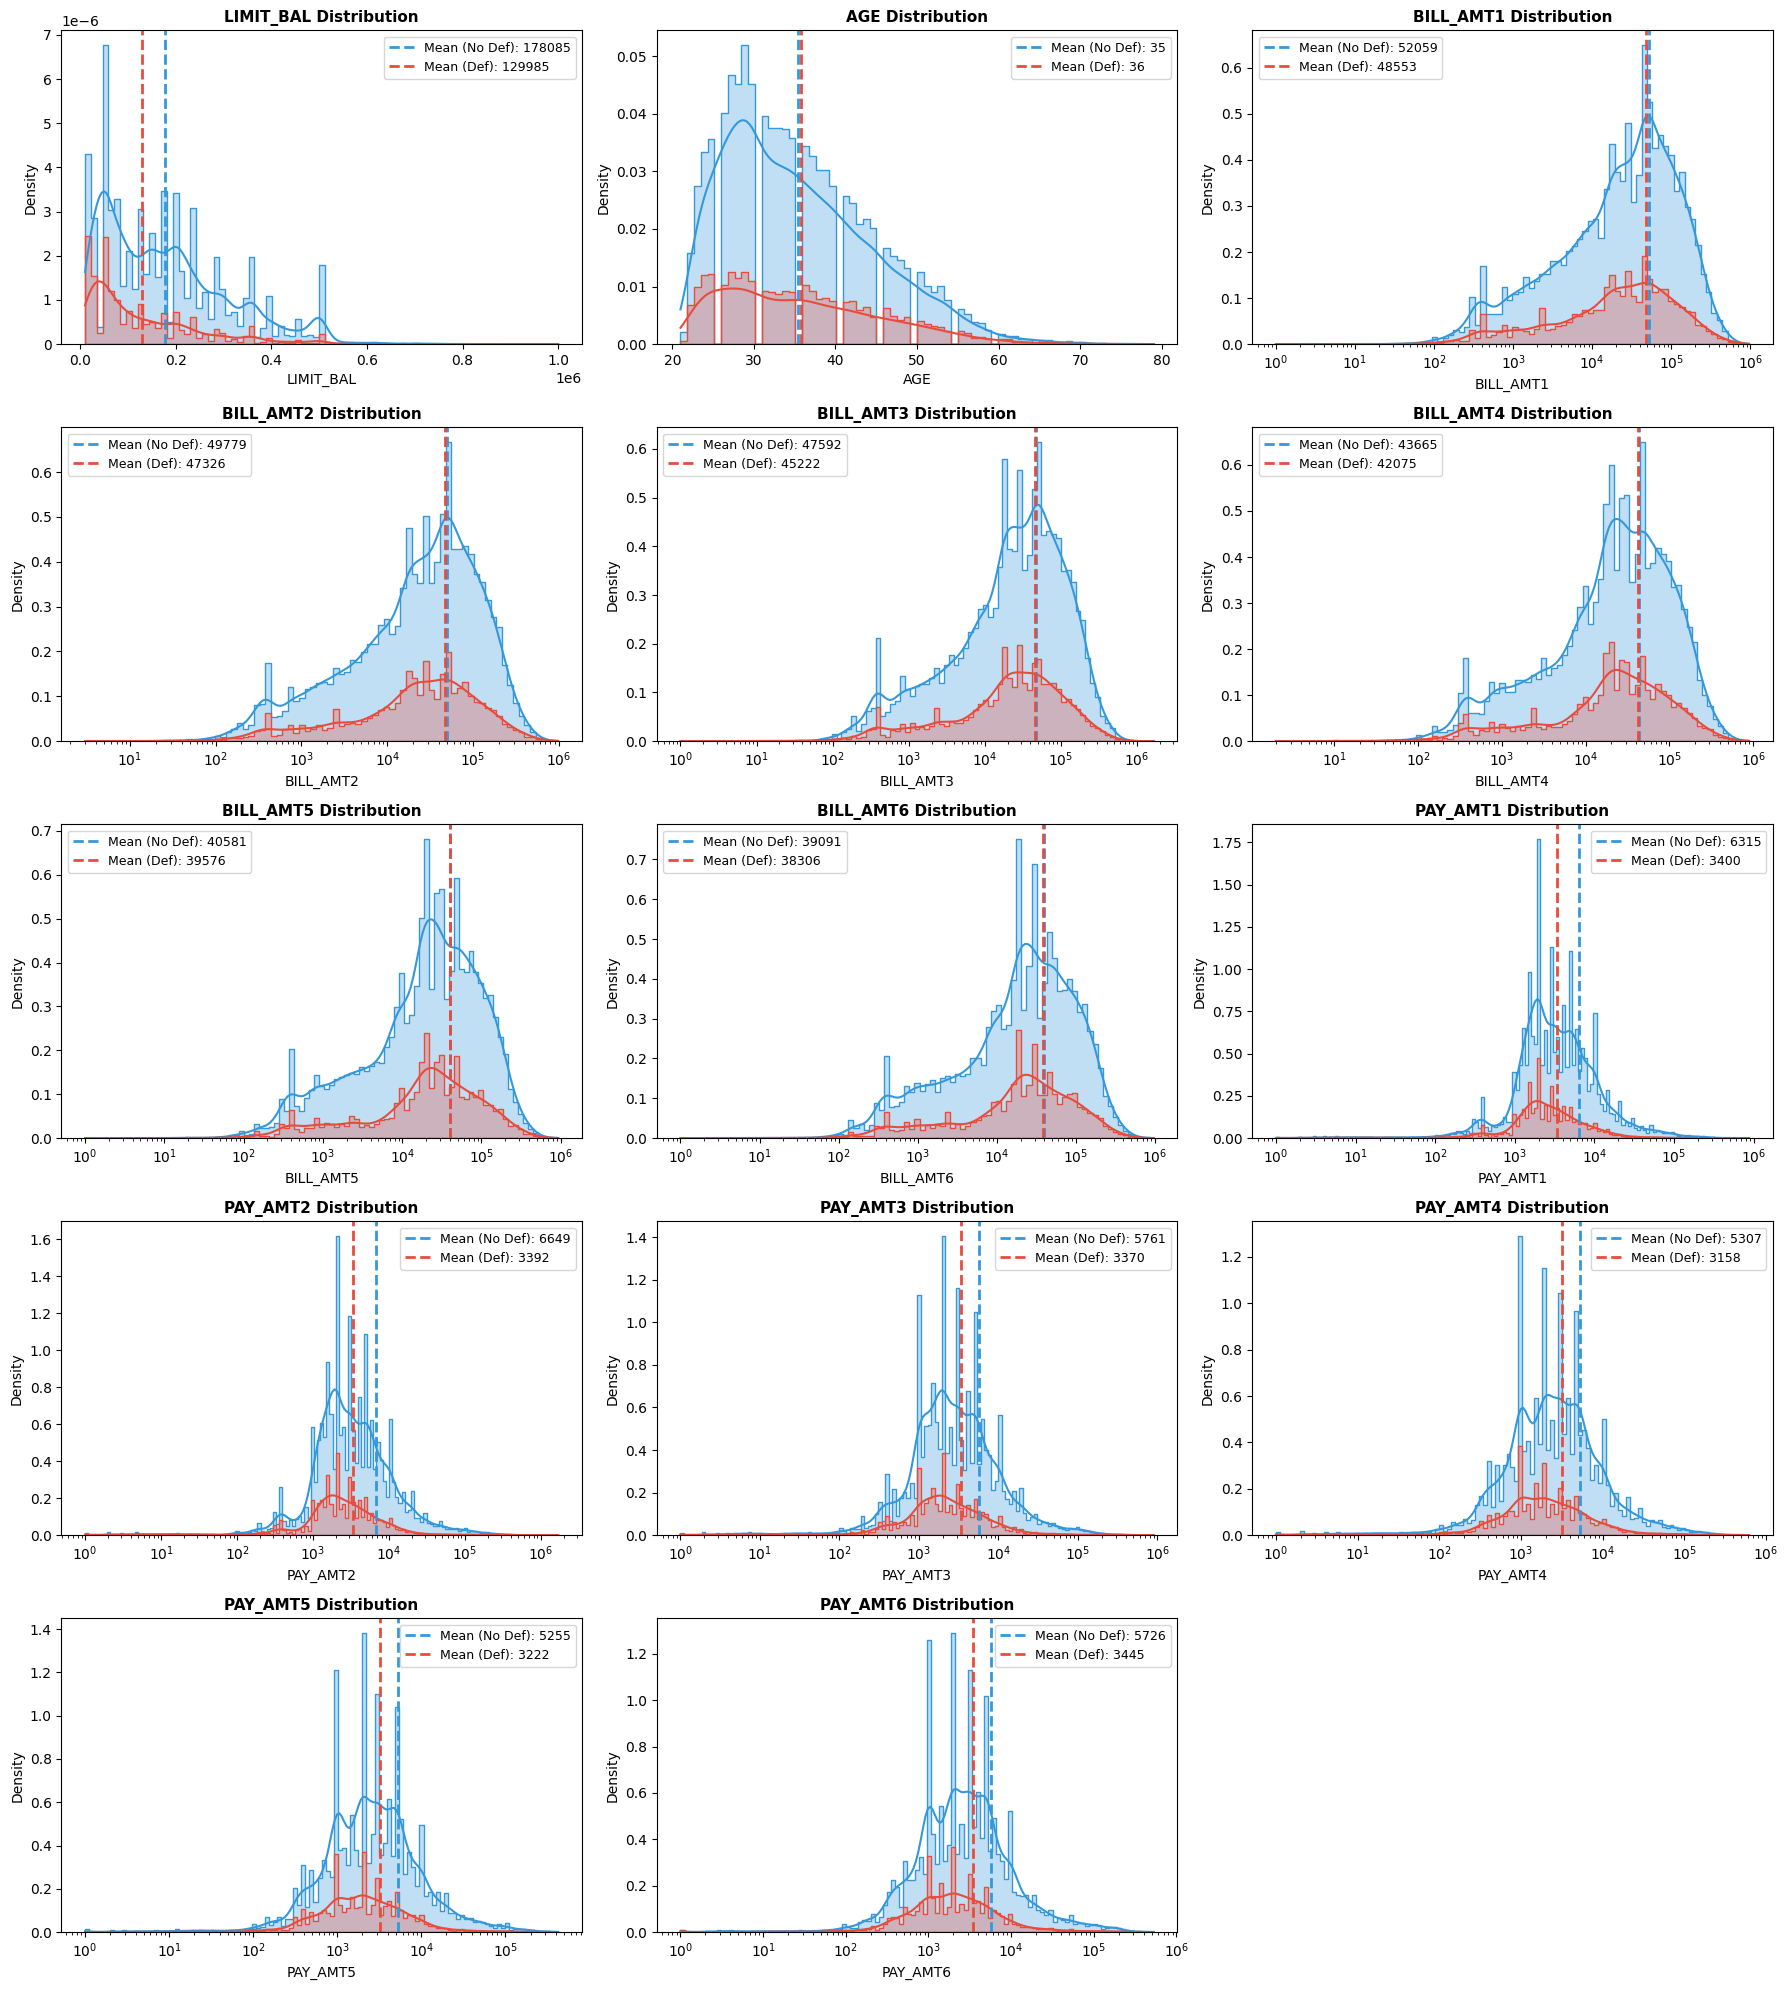

In [63]:

numerical_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# 2. Setup Target
target = 'DEFAULT'
class_labels = {0: 'No Default', 1: 'Default'}
colors = {0: '#3498db', 1: '#e74c3c'} # Blue for Good, Red for Bad

# 3. Calculate grid size
n_cols_to_plot = len(numerical_features)
n_rows = math.ceil(n_cols_to_plot / 3)
n_cols_grid = min(3, n_cols_to_plot)

# 4. Create Figure
fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(18, n_rows * 4))
if n_rows > 1: axes = axes.flatten()

# 5. The Loop
for i, col in enumerate(numerical_features):
    ax = axes[i]
    
    # Calculate means for the vertical lines
    mean_0 = df[df[target] == 0][col].mean()
    mean_1 = df[df[target] == 1][col].mean()

    # PLOT: Histogram
    # We use log_scale=True for Bill/Pay Amounts because financial data is often heavily skewed
    # (Lots of people with $0 bills, few with $1M bills)
    use_log = 'AMT' in col 
    
    if use_log:
        plot_data = df[df[col] > 0] # Filter for strictly positive values
    else:
        plot_data = df # Use full data
    sns.histplot(data=plot_data, x=col, hue=target, hue_order=[1, 0], 
                 kde=True, element='step', stat='density', # Density helps compare groups of different sizes
                 ax=ax, palette=colors, alpha=0.3, log_scale=use_log)

    # Add Vertical Mean Lines
    ax.axvline(mean_0, color=colors[0], linestyle='--', linewidth=2, label=f'Mean (No Def): {mean_0:.0f}')
    ax.axvline(mean_1, color=colors[1], linestyle='--', linewidth=2, label=f'Mean (Def): {mean_1:.0f}')

    # Formatting
    ax.set_title(f'{col} Distribution', fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Some insights from the graphs
- `LIMIT_BAL`: The mean of limit balance for `No-default` cohort is far higher than that of `Default`, meaning that people who are not defaulted often have really high credits. That can also be illustrated in the small red portion at the right tail (represent people with high credit) of the histogram.
- The same goes for `PAY_AMT`, people who pay more incur a smaller risk of being defaulted
- Eventhough `AGE` and `BILL_AMT` are not some strong separators, in the `BILL_AMT`, we can see that the higher the bill, the more people being defaulted (the "fat" right tail in the graph), which makes sense.

### Categorical Variables

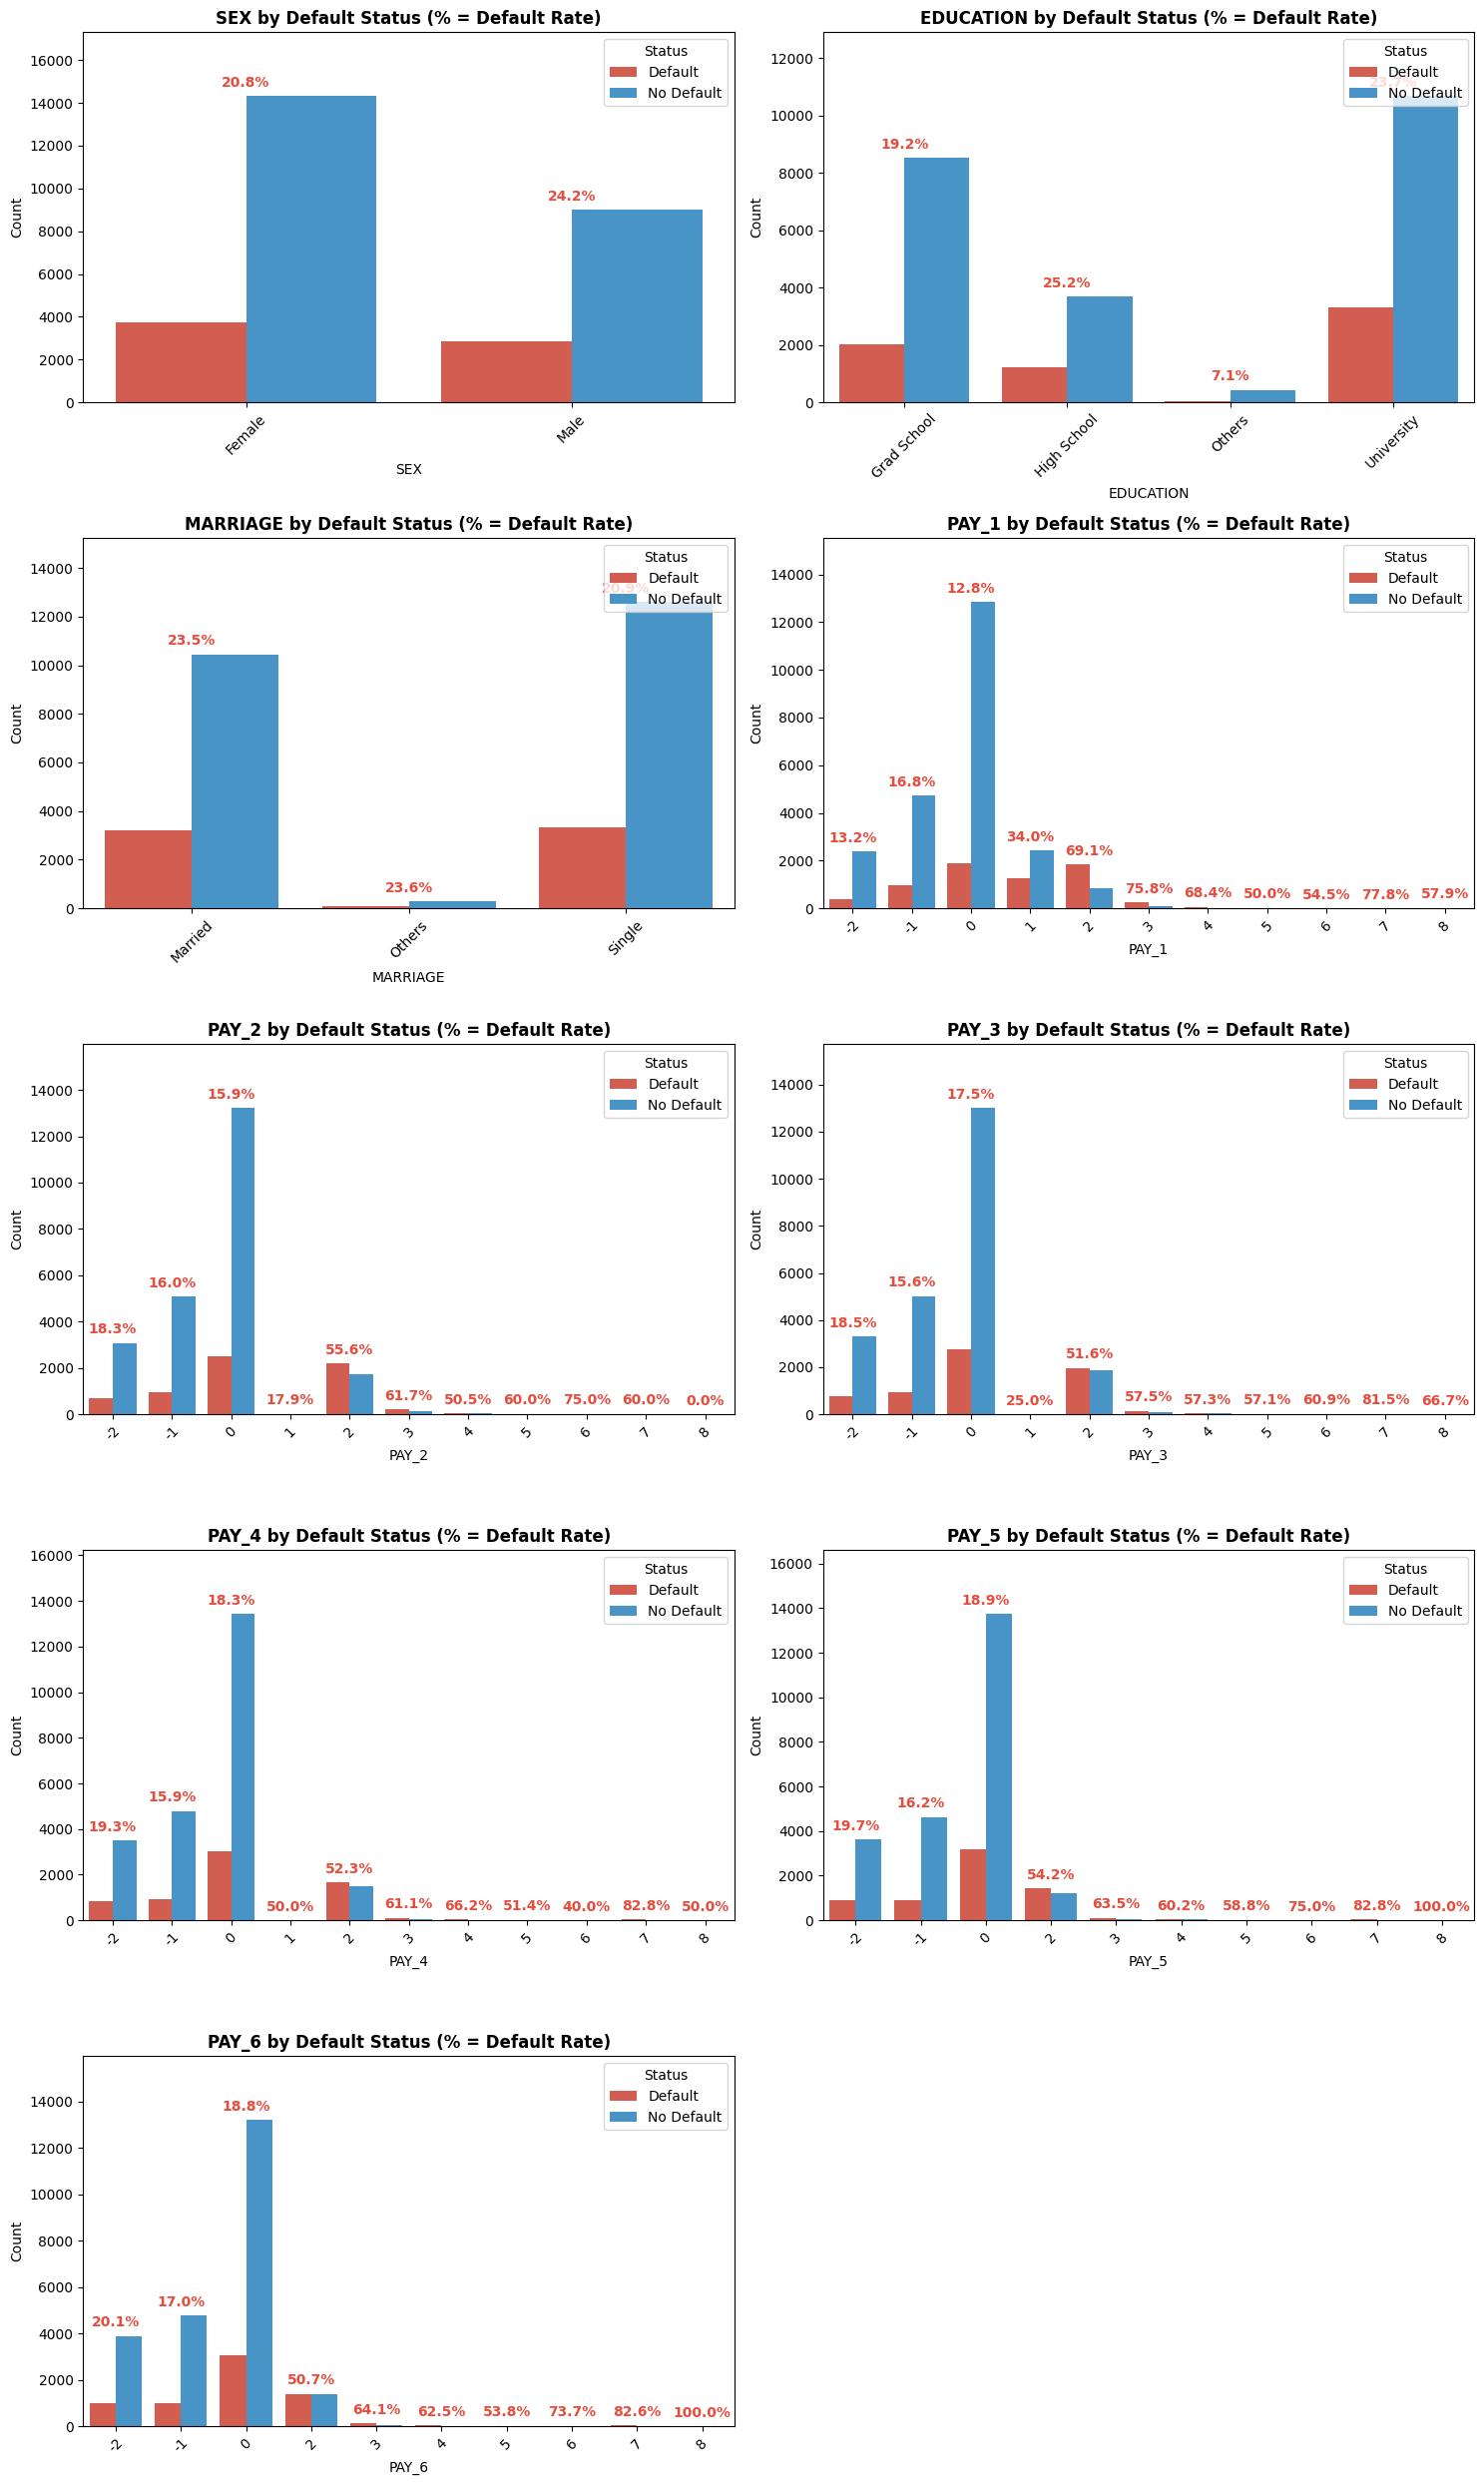

In [64]:
# 1. Setup the specific columns and target for the Credit Default project
# We include all non-numeric, non-continuous features
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(1, 7)]
target_col = 'DEFAULT' # Use your actual target column name

# Create temporary mapping for clean plotting labels (Optional but helpful)
label_maps = {
    'SEX': {1: 'Male', 2: 'Female'},
    'EDUCATION': {1: 'Grad School', 2: 'University', 3: 'High School', 4: 'Others'},
    'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'},
    target_col: {0: 'No Default', 1: 'Default'}
}
df_plot = df.copy()
for col, mapping in label_maps.items():
    if col in df_plot.columns:
        df_plot[col] = df_plot[col].map(mapping)

# Use the mapped target and target positive class
mapped_target_col = target_col
target_positive = 'Default' 
target_negative = 'No Default'
default_color = '#e74c3c' # Red
non_default_color = '#3498db' # Blue

# 2. Calculate grid size dynamically
n_cols_to_plot = len(cat_cols)
n_rows = math.ceil(n_cols_to_plot / 2)
n_cols_grid = min(2, n_cols_to_plot)

# 3. Plot configurations
fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(15, n_rows * 5))

# Flatten axes for easy iteration
if n_cols_to_plot == 1:
    axes = [axes]
elif n_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    # 1. Define fixed order
    order_list = sorted(df_plot[col].dropna().unique())
    
    # 2. Create the countplot
    sns.countplot(data=df_plot, x=col, hue=mapped_target_col, hue_order=[target_positive, target_negative],
                  ax=ax, palette={target_negative: non_default_color, target_positive: default_color},
                  order=order_list)
    
    # 3. Aggregate data to calculate default rates
    counts = df_plot.groupby([col, mapped_target_col]).size().unstack(fill_value=0)
    y_max_limit = ax.get_ylim()[1]

    # Place text above the bars for each category
    for idx, category in enumerate(order_list):
        if category in counts.index:
            n_pos = counts.loc[category].get(target_positive, 0)
            n_neg = counts.loc[category].get(target_negative, 0)
            total = n_pos + n_neg
            
            # Calculate default rate
            rate = (n_pos / total * 100) if total > 0 else 0
            
            # Determine Y position for text
            max_bar_height = max(n_pos, n_neg)
            text_y = max_bar_height + (y_max_limit * 0.02)
            
            # Draw text (Default Rate %)
            ax.text(idx, text_y,
                    f'{rate:.1f}%',
                    ha='center', va='bottom', fontsize=10, fontweight='bold',
                    color=default_color) # Highlight with default color

    # Adjust layout settings
    ax.set_ylim(0, ax.get_ylim()[1] * 1.15)
    ax.set_title(f'{col} by Default Status (% = Default Rate)', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Status', loc='upper right')

# Hide extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Some key insights from the data:
- Men have a higher default rate than women
- Students from higher level of education tend to have higher default rate
- `PAY` from 1 to 6 have the same pattern in their default rate: If the number is below or equal zero (signaling that the customer is doing well), the rate would be slow. In contrast, with higher number like `1` or `2`, the default rate is significantly high (over 50%).
- This pattern is starkly manifested in the `PAY_1`, which tells that this is a strong indicator to our target. This also makes sense since `PAY_1` is actually the **most recent** status.

After doing all the exploration, we shall move to the most interesting part, which is building the model

# 4. Build the model

This is a classic binary classification problem, we will first create a baseline model using Logistic Regression

## 4.1. Prepare the Data

We need to do the final setup for our data to feed into the model, this involves Splitting Scaling, Transform,..

### Splitting the Data

We do this BEFORE any transformation, keep that in mind

In [65]:
from sklearn.model_selection import train_test_split

# Separate out the target
X = df.drop(['DEFAULT'], axis=1)
y = df['DEFAULT']

# 2. Split using the stratification technique, and 8-2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
X_train.shape, X_test.shape

((23972, 23), (5993, 23))

### Column Transformer: For Scaling (Numerical features) and Encoding (Categorical features)

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 3. Define Column Groups
# Numeric: Continuous + Ordinal (PAY_ columns)
num_cols = ['LIMIT_BAL', 'AGE'] + \
           [f'BILL_AMT{i}' for i in range(1, 7)] + \
           [f'PAY_AMT{i}' for i in range(1, 7)] + \
           [f'PAY_{i}' for i in range(1, 7)]

# Categorical: Nominal (No order)
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

In [68]:
# 4. Create the "Preprocessor" (The Universal Handler)
preprocessor = ColumnTransformer(
    transformers=[
        # (Name, Transformer, Columns to apply it to)
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    verbose_feature_names_out=False # Keeps column names clean (e.g., 'SEX_1' instead of 'cat__SEX_1')
)

In [69]:
# 5. Fit on Train, Transform Test (All in one go!)
# This returns Numpy Arrays (math matrices), which strips column names.
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [70]:
# Optional: Convert back to DataFrame for readability (so you can see what happened)
# We get the new column names from the encoder
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [71]:
X_train_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1.022024,-0.050264,-0.700030,-0.694464,-0.678531,-0.674057,-0.665085,-0.652938,-0.338846,-0.245685,...,-1.492534,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.903020,0.167213,-0.049079,-0.005582,0.032115,0.072324,-0.220084,-0.208968,-0.200960,-0.183578,...,2.005012,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.672015,-1.355126,-0.693968,-0.688208,-0.672134,-0.660258,-0.650460,-0.645486,-0.312228,-0.227301,...,0.256239,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.903020,-1.028910,-0.694705,-0.665187,-0.672912,-0.667997,-0.665085,-0.639846,-0.214269,-0.229537,...,-0.618147,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.252006,-0.593956,-0.037938,0.009043,-0.321904,1.244053,1.513376,1.516122,0.877787,0.784923,...,-1.492534,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 4.2. Create the Baseline

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Initialize the Baseline Model
# solver='liblinear' is standard for binary problems.
# class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies.
log_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# 2. Train the Model
print("Training Baseline Logistic Regression...")
log_model.fit(X_train_df, y_train)

# 3. Generate Predictions
y_pred = log_model.predict(X_test_df)               # The decisions (0 or 1)
y_prob = log_model.predict_proba(X_test_df)[:, 1]   # The probability score (0.0 to 1.0)

# 4. Evaluate Performance
print("\n--- BASELINE RESULTS ---")
print(classification_report(y_test, y_pred))


Training Baseline Logistic Regression...

--- BASELINE RESULTS ---
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4667
           1       0.37      0.63      0.47      1326

    accuracy                           0.68      5993
   macro avg       0.62      0.66      0.62      5993
weighted avg       0.76      0.68      0.71      5993



Actually it's better to see these statistics in a confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[3251, 1416],
       [ 488,  838]])

Text(50.722222222222214, 0.5, 'Actual Label')

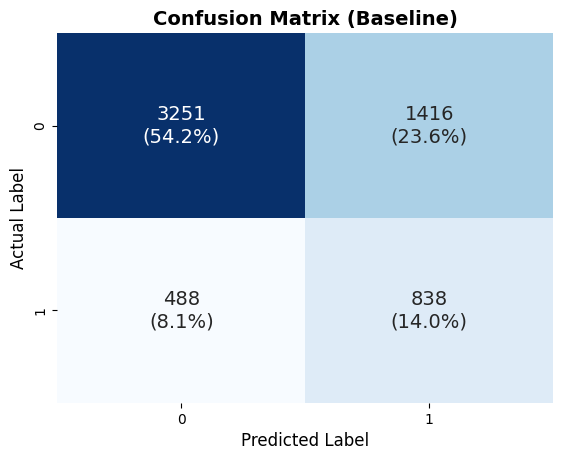

In [74]:
# Create custom labels for the boxes (Count + Percentage)
# This loop calculates the % of data in each box relative to the total test set
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
group_percentages = [f"({value:.1%})" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plot Heatmap
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix (Baseline)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

Top-left and bottom right are all the cases where we made the right decision (True Postives and True Negatives). But we did have some misclassification though:
- The Top-Right (False Positives) are the wrong prediction we made for the non-default cohort (we thought them as defaulted)
- The Top-Left (False Negatives) are the ones we wrongly believe, yet defaulted in real life. This is the portion that we should really concentrate on

Now we shall see the AUC Score and the ROC curve

In [75]:
# 3. The "Grade" (AUC Score)
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {auc_score:.4f}")


ROC-AUC Score: 0.7191


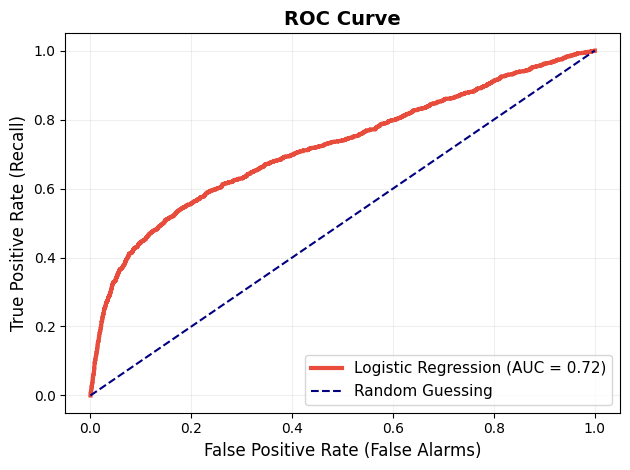

In [76]:
from sklearn.metrics import roc_curve
# False positive rate (fpr) and True positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the curve
plt.plot(fpr, tpr, color='#e74c3c', linewidth=3, label=f'Logistic Regression (AUC = {auc_score:.2f})')
# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guessing')

# Formatting
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate (False Alarms)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## 4.3. Using Random Forest


In [77]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=10,           # Restrict depth to prevent overfitting
    min_samples_leaf=5,     # A leaf must have at least 5 samples (smooths the model)
    random_state=42,        # For reproducibility
    class_weight='balanced',# Handle imbalance
    n_jobs=-1               # Use all CPU cores for speed
)

# 2. Train the model
rf_model.fit(X_train_df, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

The eval metrics

In [78]:
# 1. Predict
y_pred_rf = rf_model.predict(X_test_df)
y_prob_rf = rf_model.predict_proba(X_test_df)[:, 1]

# 2. Metrics
print("\n--- RANDOM FOREST RESULTS ---")
print(classification_report(y_test, y_pred_rf))

rf_auc = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest AUC Score: {rf_auc:.4f}")


--- RANDOM FOREST RESULTS ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4667
           1       0.50      0.56      0.53      1326

    accuracy                           0.78      5993
   macro avg       0.68      0.70      0.69      5993
weighted avg       0.79      0.78      0.78      5993

Random Forest AUC Score: 0.7685


Visualize the ROC Curve

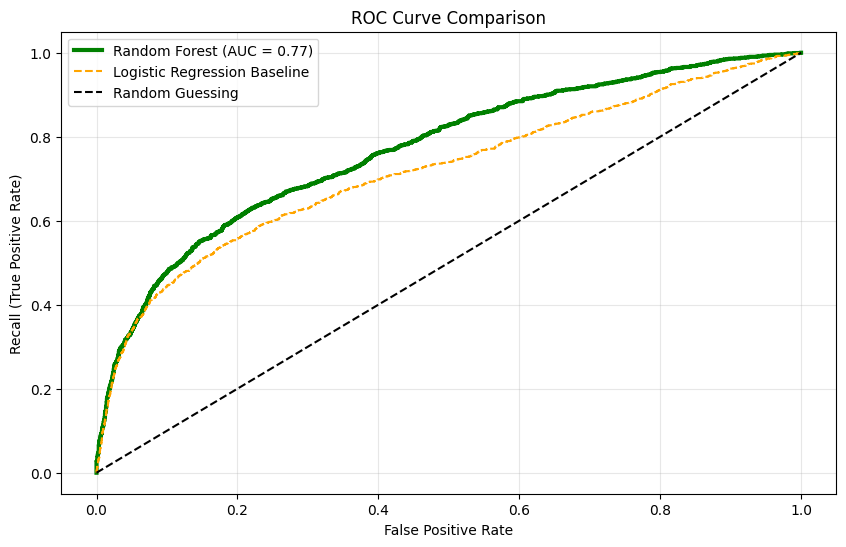

In [79]:
# 3. Compare with Baseline (Visual Battle)
# Note: We are assuming you still have 'y_prob' from the Logistic Regression in memory
# If not, just ignore the orange line in the plot.

plt.figure(figsize=(10, 6))

# Plot RF Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, color='green', linewidth=3, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Plot Baseline Curve (if available)
try:
    fpr_log, tpr_log, _ = roc_curve(y_test, y_prob) # from previous step
    plt.plot(fpr_log, tpr_log, color='orange', linestyle='--', label='Logistic Regression Baseline')
except NameError:
    pass # Skip if baseline variable is lost

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (True Positive Rate)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Importance

/tmp/ipykernel_1053/3300417474.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')


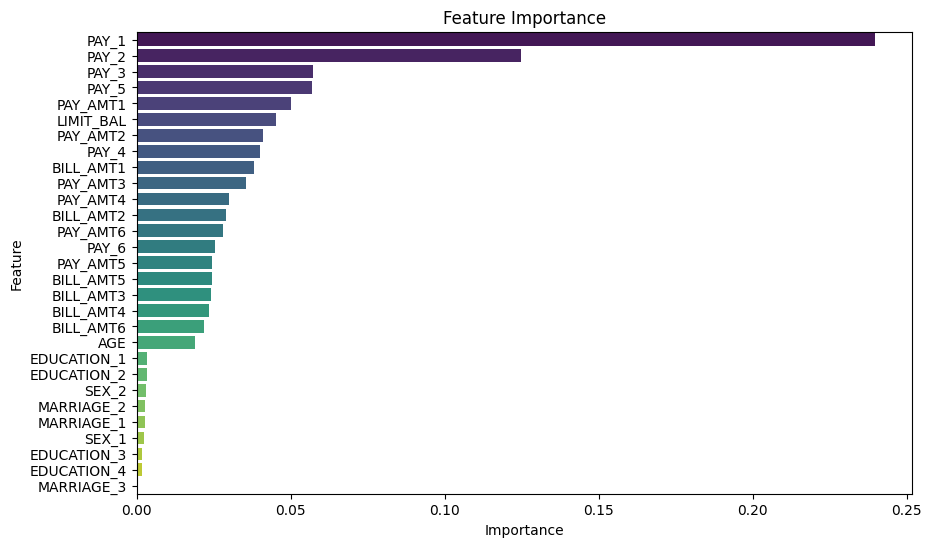

In [80]:
# 1. Get Importance numbers
importances = rf_model.feature_importances_

# 2. Map them to column names
feature_names = X_train_df.columns
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort 
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

This confirms our earlier findings:
- `PAY_1` is dominating the chart, it's a great predictor, also, other `PAY_X` have high ranks in the chart as well
- `LIMIT_BAL` is also important, maybe the intial credit of each person holds some information
- Recent `BILL` and `PAY_AMT` are also have high ranks, showing that the model really cares about the recent state (which is surprisingly intuitive)
- `SEX`, `MARRIAGE`, and `EDUCATION` have little influence on the choice of the model, and also the `AGE`.

# 5. Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

# 1. Define the "Grid" of options to test
# We keep it small for this tutorial to save time, but usually you'd test more.
param_grid = {
    'n_estimators': [100, 200],      # Try 100 trees and 200 trees
    'max_depth': [10, 15, 20],       # Try different depths
    'min_samples_leaf': [2, 5]       # Try different "smoothness" levels
}

# 2. Initialize the Searcher
# We use the Random Forest as the base
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# GridSearchCV(Model, Grid, Scoring Metric, Cross-Validation Folds)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',  # We optimize for AUC (not Accuracy!)
    cv=3,               # 3-Fold Cross Validation (Speed over precision for now)
    verbose=2,          # Print progress
    n_jobs=-1           # Use all CPU cores
)

# 3. Run the Search (Fit on Training Data)
print("Starting Hyperparameter Tuning (This may take 1-2 minutes)...")
grid_search.fit(X_train_df, y_train)

# 4. Report the Winner
print("\n--- TUNING COMPLETE ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation AUC: {grid_search.best_score_:.4f}")

# 5. Capture the Best Model
best_rf_model = grid_search.best_estimator_

Starting Hyperparameter Tuning (This may take 1-2 minutes)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.0s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   3.2s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   3.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   3.5s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   3.8s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=200; total time=   5.3s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total time=   5.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=200; total time=   5.5s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total time=   5.6s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total

Final Eval

In [82]:
# 1. Predict using the Best Model
y_pred_final = best_rf_model.predict(X_test_df)
y_prob_final = best_rf_model.predict_proba(X_test_df)[:, 1]

# 2. Final Evaluation
print("\n--- FINAL MODEL RESULTS (Optimized) ---")
print(classification_report(y_test, y_pred_final))

final_auc = roc_auc_score(y_test, y_prob_final)
print(f"Final Test AUC Score: {final_auc:.4f}")

# 3. Did Tuning Help?
print(f"\nBaseline (LogReg) AUC: {auc_score:.4f}")
print(f"Random Forest (Guessed) AUC: {rf_auc:.4f}") # from previous step
print(f"Random Forest (Tuned) AUC:   {final_auc:.4f}")


--- FINAL MODEL RESULTS (Optimized) ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4667
           1       0.50      0.56      0.53      1326

    accuracy                           0.78      5993
   macro avg       0.69      0.70      0.69      5993
weighted avg       0.79      0.78      0.78      5993

Final Test AUC Score: 0.7697

Baseline (LogReg) AUC: 0.7191
Random Forest (Guessed) AUC: 0.7685
Random Forest (Tuned) AUC:   0.7697


# 6. Experimenting with other models

## 6.1. Feature Engineering

In [88]:
# Create a new copy to avoid messing up the original df
df_eng = df.copy()

print("--- Engineering New Features ---")

# 1. Utilization Ratio (Risk of Over-leverage)
# How much of their limit are they using right now?
# We add +1 to divisor to avoid DivisionByZero errors
df_eng['UTILIZATION_SEPT'] = df_eng['BILL_AMT1'] / (df_eng['LIMIT_BAL'] + 1)

# 2. Payment Ratio (Financial Stability)
# What % of their bill did they actually pay?
# (Previous month's bill vs This month's payment)
# Note: PAY_AMT1 (Sept Pay) pays off BILL_AMT2 (Aug Bill) logic usually applies, 
# but for simplicity in this dataset, we often compare PAY_AMT1 to BILL_AMT1 directly or look at the lag.
# Let's use the direct ratio for the most recent month.
df_eng['PAY_RATIO_SEPT'] = df_eng['PAY_AMT1'] / (df_eng['BILL_AMT1'] + 1.1)

# 3. Rising Debt Trend (spending behavior)
# Is their bill higher now (Sept) than 6 months ago (April)?
df_eng['DEBT_GROWTH_6M'] = df_eng['BILL_AMT1'] - df_eng['BILL_AMT6']

# 4. Delinquency Count (History of bad behavior)
# How many months in the last 6 were they late? (PAY_x > 0)
pay_cols = [f'PAY_{i}' for i in range(1, 7)]
df_eng['LATE_COUNT'] = (df_eng[pay_cols] > 0).sum(axis=1)

# 5. Zero-Balance Flag
# Sometimes having 0 bill is a special signal (inactive user)
df_eng['IS_INACTIVE'] = (df_eng['BILL_AMT1'] == 0).astype(int)

print("New Features Created:")
print(df_eng[['UTILIZATION_SEPT', 'PAY_RATIO_SEPT', 'DEBT_GROWTH_6M', 'LATE_COUNT']].head())

--- Engineering New Features ---
New Features Created:
    UTILIZATION_SEPT  PAY_RATIO_SEPT  DEBT_GROWTH_6M  LATE_COUNT
ID                                                              
1           0.195640        0.000000          3913.0           2
2           0.022350        0.000000          -579.0           2
3           0.324874        0.051915         13690.0           0
4           0.939781        0.042561         17443.0           0
5           0.172337        0.232070        -10514.0           0


In [89]:
df_eng.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,UTILIZATION_SEPT,PAY_RATIO_SEPT,DEBT_GROWTH_6M,LATE_COUNT,IS_INACTIVE
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.842750,1.557283,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,5231.688837,4831.617454,4804.897047,5221.498014,0.221258,0.424255,97.729705,12365.997497,0.834273,0.066010
std,129760.135222,0.489128,0.744513,0.521431,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.411442,3193.630141,43946.036412,1.554821,0.248304
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619890,-11162.307692,-428791.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,300.000000,261.000000,131.000000,0.000000,0.022298,0.034440,-2976.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1804.000000,1500.000000,1500.000000,1500.000000,0.000000,0.315277,0.055684,933.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4512.000000,4016.000000,4042.000000,4000.000000,0.000000,0.830315,0.263975,19827.000000,1.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,6.454977,354360.000000,708323.000000,6.000000,1.000000


In [90]:
# 1. Define X and y again (with new features)
X = df_eng.drop(['DEFAULT'], axis=1)
y = df_eng['DEFAULT']

# 2. Re-Split (Use same random_state to compare fairly)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Update Column Groups
# We need to add our new engineered features to the "Numeric" list
new_num_features = ['UTILIZATION_SEPT', 'PAY_RATIO_SEPT', 'DEBT_GROWTH_6M', 'LATE_COUNT', 'IS_INACTIVE']

# Re-define lists
num_cols = ['LIMIT_BAL', 'AGE'] + \
           [f'BILL_AMT{i}' for i in range(1, 7)] + \
           [f'PAY_AMT{i}' for i in range(1, 7)] + \
           [f'PAY_{i}' for i in range(1, 7)] + \
           new_num_features # <--- ADDED HERE

cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# 4. Re-Build Preprocessor
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    verbose_feature_names_out=False
)

# 5. Transform
X_train_eng = preprocessor_eng.fit_transform(X_train)
X_test_eng = preprocessor_eng.transform(X_test)

# Convert to DataFrame for XGBoost (it likes column names)
feat_names = preprocessor_eng.get_feature_names_out()
X_train_eng_df = pd.DataFrame(X_train_eng, columns=feat_names)
X_test_eng_df = pd.DataFrame(X_test_eng, columns=feat_names)

print(f"Data ready with Engineered Features! Shape: {X_train_eng_df.shape}")

Data ready with Engineered Features! Shape: (23972, 34)


## 6.2. XGBoost

In [91]:
# !pip install xgboost  <-- Run this in a terminal if you haven't installed it
from xgboost import XGBClassifier

# 1. Initialize XGBoost
# scale_pos_weight is XGBoost's version of class_weight='balanced'
# Formula: (Count of Negatives) / (Count of Positives)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

xgb_model = XGBClassifier(
    n_estimators=200,       # It usually needs more trees than RF
    learning_rate=0.05,     # Slower learning = more precision
    max_depth=6,            # Standard starting depth
    scale_pos_weight=ratio, # Handle Imbalance
    random_state=42,
    n_jobs=-1,
    eval_metric='auc'       # Optimize for AUC
)

# 2. Train
print("Training XGBoost on Engineered Features...")
xgb_model.fit(X_train_eng_df, y_train)

# 3. Evaluate
y_pred_xgb = xgb_model.predict(X_test_eng_df)
y_prob_xgb = xgb_model.predict_proba(X_test_eng_df)[:, 1]

print("\n--- XGBOOST RESULTS (with Feature Eng) ---")
xgb_auc = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost AUC: {xgb_auc:.4f}")
print(f"Previous RF AUC: {final_auc:.4f}") # Compare with your RF result

Training XGBoost on Engineered Features...

--- XGBOOST RESULTS (with Feature Eng) ---
XGBoost AUC: 0.7725
Previous RF AUC: 0.7697


FEATURE IMPORTANCE

/tmp/ipykernel_1053/3960829217.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_imp_df, palette='magma')


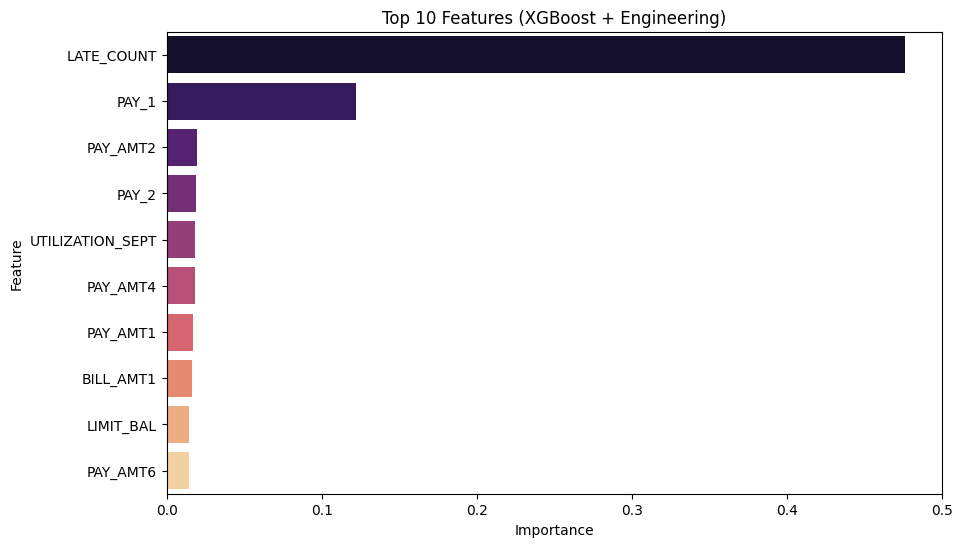

In [92]:
# Plot Importance for XGBoost
importances = xgb_model.feature_importances_
xgb_imp_df = pd.DataFrame({'Feature': X_train_eng_df.columns, 'Importance': importances})
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_imp_df, palette='magma')
plt.title('Top 10 Features (XGBoost + Engineering)')
plt.show()

Feature Engineering helps!

## 6.1. Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# 1. Calculate Mutual Information
# This measures the dependency between variables. 0 = Independent (Useless).
print("Calculating Mutual Information (this takes a moment)...")
mi_scores = mutual_info_classif(X_train_eng_df, y_train, random_state=42)

# 2. Create a DataFrame to view them
mi_df = pd.DataFrame({'Feature': X_train_eng_df.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# 3. Visualize
plt.figure(figsize=(12, 8))
sns.barplot(x='MI_Score', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores (The True Value of Each Feature)')
plt.show()

print("--- Insight ---")
print("Top 5 Features by Information Content:")
print(mi_df.head(5))
print("\nBottom 5 Features (Candidates for Removal):")
print(mi_df.tail(5))